In [1]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from wordcloud import WordCloud
from collections import Counter

In [2]:
# N·∫°p d·ªØ li·ªáu
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
# df = pd.read_csv('D:/PROJECT/Classification_Status/Data/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None) #thay ƒë·ªïi ƒë∆∞·ªùng d·∫´n t·ªõi file d·ªØ li·ªáuli·ªáuc
# ƒê·∫∑t t√™n cho c√°c c·ªôt
df.columns = ['target', 'id', 'date', 'query', 'user', 'text']

# Xem tr∆∞·ªõc d·ªØ li·ªáu
df.head()

# Gi·ªØ l·∫°i 2 c·ªôt quan tr·ªçng l√† 'polarity' v√† 'text'
df = df[['target', 'text']]



In [3]:
# Lo·∫°i b·ªè c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát, s·ªë v√† chuy·ªÉn th√†nh ch·ªØ th∆∞·ªùng
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Lo·∫°i b·ªè URL
    text = re.sub(r'\@\w+|\#', '', text)  # Lo·∫°i b·ªè @ v√† #
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Ch·ªâ gi·ªØ l·∫°i ch·ªØ c√°i
    text = text.lower()  # Chuy·ªÉn th√†nh ch·ªØ th∆∞·ªùng
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Lo·∫°i b·ªè c√°c stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):  # Ki·ªÉm tra n·∫øu text l√† chu·ªói
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''  

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# Xem d·ªØ li·ªáu sau khi l√†m s·∫°ch
df.head()

target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0      thats bummer shoulda got david carr third day  
1  upset cant update facebook texting might cry r...  
2  dived many times ball managed save rest go bounds  
3                   whole body feels itchy like fire  
4                           behaving im mad cant see

In [4]:
# # T√°ch c√°c c√¢u t√≠ch c·ª±c v√† ti√™u c·ª±c
# negative_texts = df['clean_text'][:800000].dropna().astype(str)  # 800,000 d√≤ng ƒë·∫ßu ti√™n l√† ti√™u c·ª±c
# positive_texts = df['clean_text'][800000:].dropna().astype(str)  # 800,000 d√≤ng ti·∫øp theo l√† t√≠ch c·ª±c

# # ƒê·∫øm t·∫ßn su·∫•t t·ª´ v·ª±ng
# positive_words = ' '.join(positive_texts).split()
# negative_words = ' '.join(negative_texts).split()

# # ƒê·∫øm s·ªë l∆∞·ª£ng t·ª´ ph·ªï bi·∫øn nh·∫•t
# positive_word_freq = Counter(positive_words)
# negative_word_freq = Counter(negative_words)

# # 10 t·ª´ ph·ªï bi·∫øn nh·∫•t trong c√¢u t√≠ch c·ª±c
# print("Top 10 t·ª´ ph·ªï bi·∫øn trong c√°c c√¢u t√≠ch c·ª±c:")
# print(positive_word_freq.most_common(10))

# # 10 t·ª´ ph·ªï bi·∫øn nh·∫•t trong c√¢u ti√™u c·ª±c
# print("Top 10 t·ª´ ph·ªï bi·∫øn trong c√°c c√¢u ti√™u c·ª±c:")
# print(negative_word_freq.most_common(10))


In [5]:
from collections import Counter

negative_texts = df['clean_text'][:50].dropna().astype(str)  
positive_texts = df['clean_text'][800000:800000+50].dropna().astype(str)  

# ƒê·∫øm t·∫ßn su·∫•t t·ª´ v·ª±ng
positive_words = ' '.join(positive_texts).split()
negative_words = ' '.join(negative_texts).split()

# ƒê·∫øm s·ªë l∆∞·ª£ng t·ª´ ph·ªï bi·∫øn nh·∫•t
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# 10 t·ª´ ph·ªï bi·∫øn nh·∫•t trong c√¢u t√≠ch c·ª±c
print("Top 10 t·ª´ ph·ªï bi·∫øn trong c√°c c√¢u t√≠ch c·ª±c:")
print(positive_word_freq.most_common(10))

# 10 t·ª´ ph·ªï bi·∫øn nh·∫•t trong c√¢u ti√™u c·ª±c
print("Top 10 t·ª´ ph·ªï bi·∫øn trong c√°c c√¢u ti√™u c·ª±c:")
print(negative_word_freq.most_common(10))


Top 10 t·ª´ ph·ªï bi·∫øn trong c√°c c√¢u t√≠ch c·ª±c:
[('love', 4), ('tonight', 4), ('thanks', 4), ('twitter', 4), ('dont', 4), ('new', 4), ('im', 3), ('show', 3), ('really', 3), ('already', 3)]
Top 10 t·ª´ ph·ªï bi·∫øn trong c√°c c√¢u ti√™u c·ª±c:
[('im', 7), ('sad', 7), ('like', 5), ('time', 5), ('day', 4), ('see', 4), ('didnt', 4), ('one', 4), ('dont', 4), ('got', 3)]


In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')

# H√†m ƒë·ªÉ l·∫•y POS tags
def pos_tagging(texts):
    all_tags = []
    for text in texts:
        tokens = word_tokenize(text)
        tags = pos_tag(tokens)
        all_tags.extend([tag for word, tag in tags])
    return all_tags

# POS tagging cho c√¢u t√≠ch c·ª±c v√† ti√™u c·ª±c
positive_pos_tags = pos_tagging(positive_texts)
negative_pos_tags = pos_tagging(negative_texts)

# ƒê·∫øm t·∫ßn su·∫•t POS tags
positive_pos_freq = Counter(positive_pos_tags)
negative_pos_freq = Counter(negative_pos_tags)

# Xem c√°c POS tags ph·ªï bi·∫øn
print("Top POS tags trong c√¢u t√≠ch c·ª±c:")
print(positive_pos_freq.most_common(10))

print("Top POS tags trong c√¢u ti√™u c·ª±c:")
print(negative_pos_freq.most_common(10))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Top POS tags trong c√¢u t√≠ch c·ª±c:
[('NN', 151), ('JJ', 68), ('NNS', 29), ('VBG', 27), ('RB', 23), ('VB', 20), ('VBP', 18), ('VBD', 17), ('VBN', 6), ('CD', 4)]
Top POS tags trong c√¢u ti√™u c·ª±c:
[('NN', 140), ('JJ', 63), ('NNS', 27), ('RB', 27), ('VBP', 18), ('VBD', 18), ('VBG', 16), ('VB', 15), ('IN', 8), ('VBN', 6)]


S·ªë t·ª´ t√≠ch c·ª±c: 302
S·ªë t·ª´ ti√™u c·ª±c: 272


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


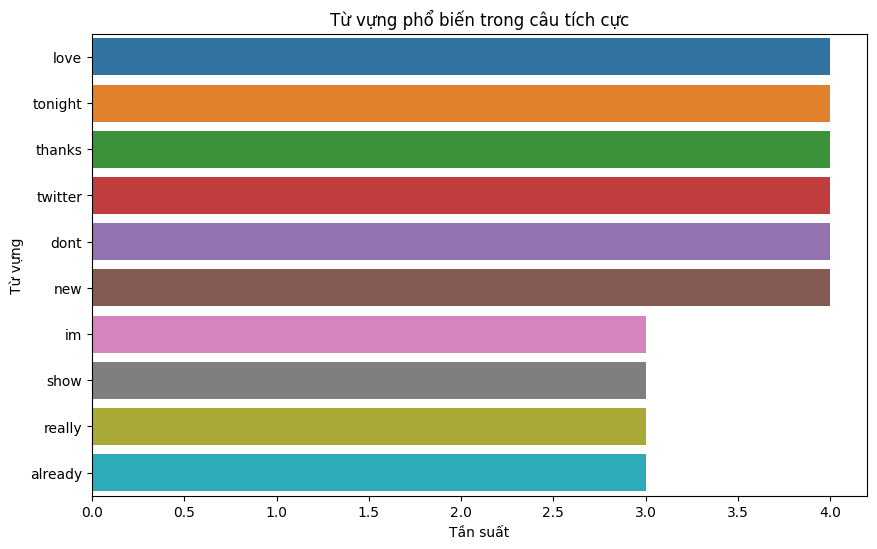

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


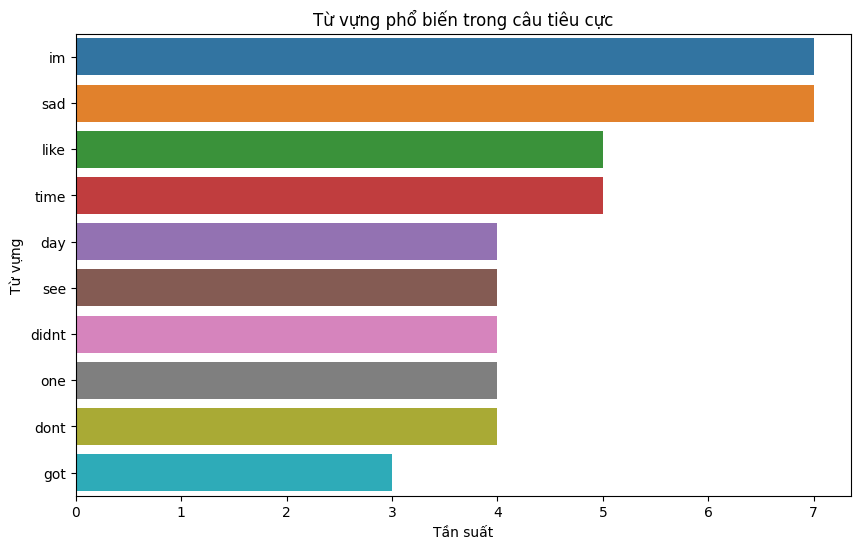

In [7]:
# Tr·ª±c quan h√≥a t·ª´ v·ª±ng ph·ªï bi·∫øn b·∫±ng seaborn
def plot_word_frequency(word_freq, title):
    # L·∫•y 10 t·ª´ ph·ªï bi·∫øn nh·∫•t
    common_words = word_freq.most_common(10)
    if not common_words:  # Ki·ªÉm tra n·∫øu kh√¥ng c√≥ t·ª´ n√†o
        print("Kh√¥ng c√≥ t·ª´ n√†o ƒë·ªÉ hi·ªÉn th·ªã.")
        return

    words = [word for word, freq in common_words]
    freqs = [freq for word, freq in common_words]

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words)
    plt.title(title)
    plt.xlabel('T·∫ßn su·∫•t')
    plt.ylabel('T·ª´ v·ª±ng')
    plt.show()
    
print("S·ªë t·ª´ t√≠ch c·ª±c:", len(positive_word_freq))
print("S·ªë t·ª´ ti√™u c·ª±c:", len(negative_word_freq))
# Bi·ªÉu ƒë·ªì cho t·ª´ v·ª±ng t√≠ch c·ª±c
plot_word_frequency(positive_word_freq, 'T·ª´ v·ª±ng ph·ªï bi·∫øn trong c√¢u t√≠ch c·ª±c')

# Bi·ªÉu ƒë·ªì cho t·ª´ v·ª±ng ti√™u c·ª±c
plot_word_frequency(negative_word_freq, 'T·ª´ v·ª±ng ph·ªï bi·∫øn trong c√¢u ti√™u c·ª±c')


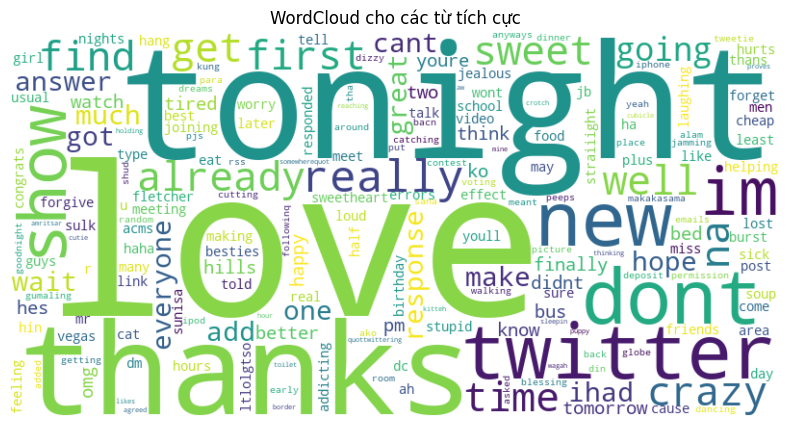

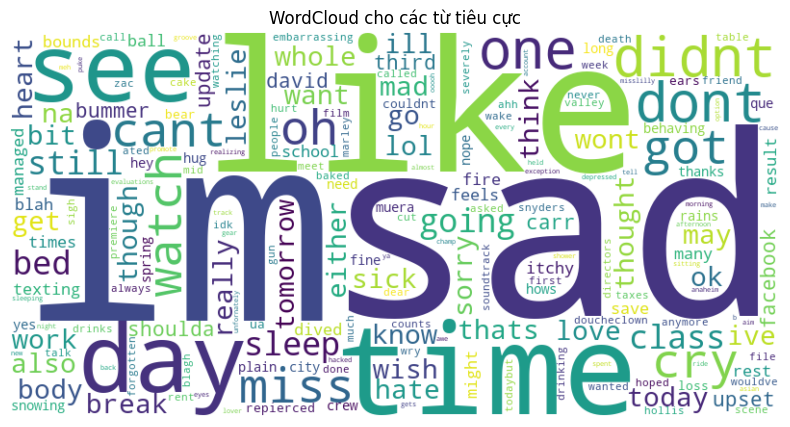

In [8]:
# T·∫°o WordCloud
def create_wordcloud(word_freq, title):
    if not word_freq:  # Ki·ªÉm tra n·∫øu kh√¥ng c√≥ t·ª´ n√†o
        print("Kh√¥ng c√≥ t·ª´ n√†o ƒë·ªÉ t·∫°o WordCloud.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # T·∫Øt tr·ª•c
    plt.title(title)
    plt.show()

# WordCloud cho t·ª´ v·ª±ng t√≠ch c·ª±c
create_wordcloud(positive_word_freq, 'WordCloud cho c√°c t·ª´ t√≠ch c·ª±c')

# WordCloud cho t·ª´ v·ª±ng ti√™u c·ª±c
create_wordcloud(negative_word_freq, 'WordCloud cho c√°c t·ª´ ti√™u c·ª±c')


In [9]:
!pip install transformers
!pip install datasets

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

In [11]:
# Chuy·ªÉn ƒë·ªïi nh√£n 4 th√†nh 1
df['target'] = df['target'].replace(4, 1)
# Ki·ªÉm tra l·∫°i nh√£n trong to√†n b·ªô DataFrame
print("Unique labels in dataset:", set(df['target']))

# ƒê·∫øm s·ªë l∆∞·ª£ng d·ªØ li·ªáu t√≠ch c·ª±c (nh√£n 1) v√† ti√™u c·ª±c (nh√£n 0)
label_counts = df['target'].value_counts()

print("S·ªë l∆∞·ª£ng d·ªØ li·ªáu t√≠ch c·ª±c v√† ti√™u c·ª±c:")
print(label_counts)

# T√°ch s·ªë li·ªáu c·ª• th·ªÉ
positive_count = label_counts[1]  # D·ªØ li·ªáu t√≠ch c·ª±c (nh√£n 1)
negative_count = label_counts[0]  # D·ªØ li·ªáu ti√™u c·ª±c (nh√£n 0)

print(f"S·ªë l∆∞·ª£ng d·ªØ li·ªáu t√≠ch c·ª±c: {positive_count}")
print(f"S·ªë l∆∞·ª£ng d·ªØ li·ªáu ti√™u c·ª±c: {negative_count}")




Unique labels in dataset: {0, 1}
S·ªë l∆∞·ª£ng d·ªØ li·ªáu t√≠ch c·ª±c v√† ti√™u c·ª±c:
target
0    800000
1    800000
Name: count, dtype: int64
S·ªë l∆∞·ª£ng d·ªØ li·ªáu t√≠ch c·ª±c: 800000
S·ªë l∆∞·ª£ng d·ªØ li·ªáu ti√™u c·ª±c: 800000


In [12]:
# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['clean_text'].tolist(),
    df['target'].tolist(),
    test_size=0.2,
    random_state=42
)


In [13]:
# T·∫£i tokenizer v√† m√¥ h√¨nh BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Token h√≥a d·ªØ li·ªáu
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=250)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=250)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# Chuy·ªÉn ƒë·ªïi th√†nh ƒë·ªãnh d·∫°ng tensor
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [15]:
train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

In [16]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [17]:
!pip install pytorch-optimizer

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 187.2/187.2 kB 9.2 MB/s eta 0:00:00


In [18]:
import torch
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback, AdamW, get_scheduler
from pytorch_optimizer import RAdam
# from torch.optim.lr_scheduler import CosineAnnealingLR
# Ki·ªÉm tra GPU c√≥ s·∫µn kh√¥ng
print(torch.cuda.is_available())  
print(torch.cuda.device_count())  

# ƒê·ªãnh nghƒ©a c√°c tham s·ªë cho hu·∫•n luy·ªán
training_args = TrainingArguments(
    output_dir='./results',                
    report_to="none",                     
    num_train_epochs=3,                   
    per_device_train_batch_size=16,        
    per_device_eval_batch_size=16,        
    warmup_steps=200,                     
    weight_decay=0.01,                    
    logging_dir='./logs',                 
    learning_rate=1e-5,                   
    adam_beta1=0.9,                       
    adam_beta2=0.999,                     
    adam_epsilon=1e-8,                    
    logging_steps=10,                     
    evaluation_strategy="steps",          
    save_steps=500,                       
    eval_steps=500,                       
    load_best_model_at_end=True,  
    metric_for_best_model="accuracy",           
    greater_is_better=True, 
    save_total_limit=2                    
)

# Th√™m EarlyStoppingCallback
callbacks = [EarlyStoppingCallback(early_stopping_patience=2)]

# T·∫°o optimizer v√† scheduler cho m√¥ h√¨nh
optimizer = RAdam([
    {'params': model.bert.encoder.layer[:6].parameters(), 'lr': 5e-5},
    {'params': model.bert.encoder.layer[6:9].parameters(), 'lr': 3e-5},
    {'params': model.bert.encoder.layer[9:].parameters(), 'lr': 2e-5},
    {'params': model.classifier.parameters(), 'lr': 2e-5}
], betas=(0.9, 0.999),weight_decay=0.001)

# T√≠nh s·ªë b∆∞·ªõc hu·∫•n luy·ªán
num_training_steps = len(train_dataset) // training_args.per_device_train_batch_size * training_args.num_train_epochs

# T·∫°o scheduler cho learning rate
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=training_args.warmup_steps,
    num_training_steps=num_training_steps
)

# Kh·ªüi t·∫°o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,          
    eval_dataset=test_dataset,  
    compute_metrics=compute_metrics,
    callbacks=callbacks,                  
    optimizers=(optimizer, lr_scheduler)  
)


True
1


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
# B∆∞·ªõc 1: Hu·∫•n luy·ªán m√¥ h√¨nh
trainer.train()

# B∆∞·ªõc 2: D·ª± ƒëo√°n nh√£n cho t·∫≠p ki·ªÉm tra
predictions, labels, _ = trainer.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)

# B∆∞·ªõc 3: T·∫°o b·∫£ng so s√°nh gi·ªØa nh√£n g·ªëc v√† nh√£n d·ª± ƒëo√°n
comparison_df = pd.DataFrame({
    'Original_Text': test_texts,           # C√¢u g·ªëc t·ª´ t·∫≠p ki·ªÉm tra
    'Original_Label': test_labels,         # Nh√£n g·ªëc t·ª´ c·ªôt target
    'Predicted_Label': predictions         # Nh√£n d·ª± ƒëo√°n t·ª´ BERT
})

# In ra 20 d√≤ng ƒë·∫ßu ti√™n c·ªßa b·∫£ng so s√°nh
print(comparison_df.head(20))

# Xu·∫•t ra file CSV ƒë·ªÉ ki·ªÉm tra
comparison_df.to_csv('bert_comparison_results.csv', index=False)

# B∆∞·ªõc 4: In b√°o c√°o ph√¢n lo·∫°i
print(classification_report(test_labels, predictions))

trainer.save_model("./best_model") 

                                        Original_Text  Original_Label  \
0                                        ahhh hope ok               0   
1                                cool tweet apps razr               0   
2   know family drama lamehey next time u hang kim...               0   
3   school email wont open geography stuff revise ...               0   
4                               upper airways problem               0   
5                     going miss pastors sermon faith               0   
6                                    lunchdj come eat               1   
7                                     oh feeling like               0   
8              gahh noopeyton needs livethis horrible               0   
9   thank glad like product review bit site enjoy ...               1   
10            zach makes pee sitting im grown gay man               1   
11                          sum day one word kackered               1   
12                            great minds think ali

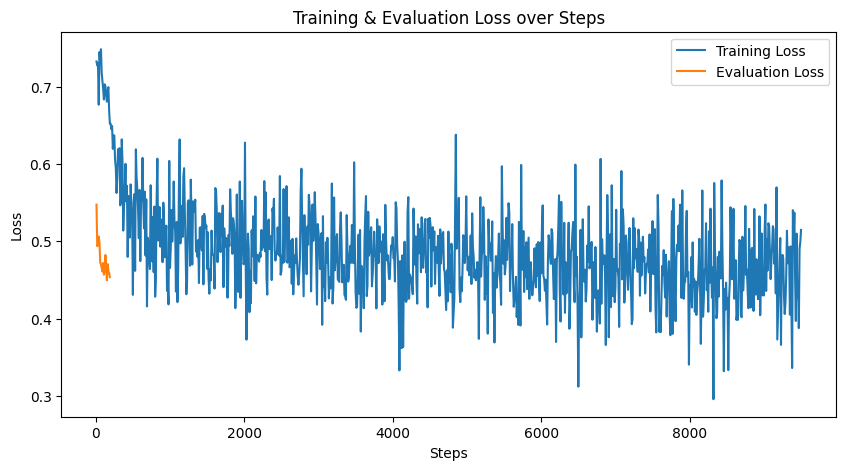

In [20]:
import matplotlib.pyplot as plt

# L·∫•y c√°c gi√° tr·ªã loss t·ª´ log_history
train_loss = []
eval_loss = []
steps = []  # S·ªë b∆∞·ªõc log

# Duy·ªát qua log_history v√† l·∫•y loss v√† eval_loss c√πng v·ªõi steps
for log in trainer.state.log_history:
    if 'loss' in log:
        train_loss.append(log['loss'])
        steps.append(log['step'])  # L∆∞u s·ªë b∆∞·ªõc t∆∞∆°ng ·ª©ng v·ªõi loss
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])

# V·∫Ω bi·ªÉu ƒë·ªì Loss theo Steps (thay v√¨ Epochs)
plt.figure(figsize=(10, 5))
plt.plot(steps, train_loss, label='Training Loss')
plt.plot(steps[:len(eval_loss)], eval_loss, label='Evaluation Loss')  # C·∫Øt eval_loss n·∫øu c·∫ßn
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training & Evaluation Loss over Steps')
plt.legend()
plt.show()


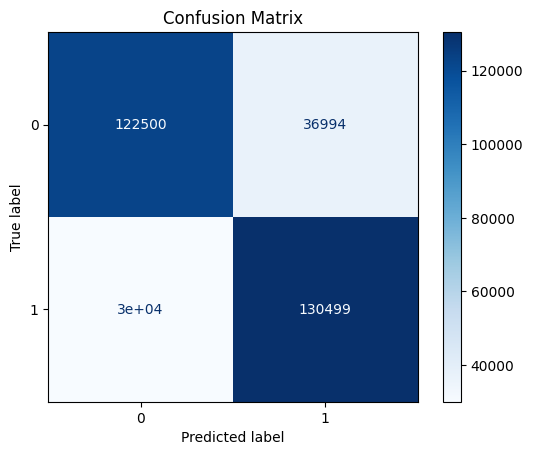

Accuracy: 0.7906
Precision: 0.7911
Recall: 0.7906
F1 Score: 0.7905
AUC-ROC: 0.7906


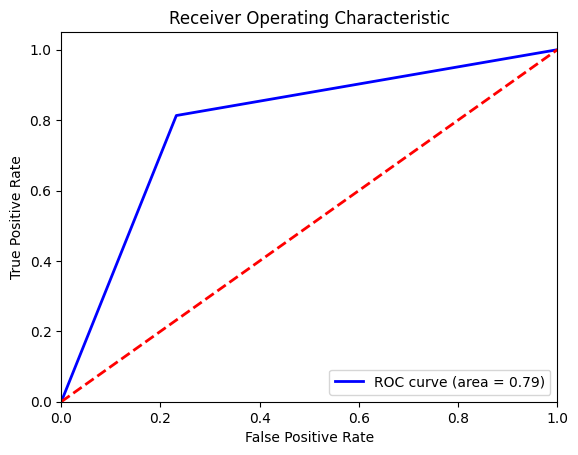

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np# B∆∞·ªõc 5: T√≠nh to√°n confusion matrix
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# T√≠nh to√°n ƒë·ªô ch√≠nh x√°c
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

# T√≠nh to√°n precision, recall, v√† f1-score
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# T√≠nh to√°n AUC-ROC
roc_auc = roc_auc_score(test_labels, predictions)
print(f"AUC-ROC: {roc_auc:.4f}")

# V·∫Ω bi·ªÉu ƒë·ªì ROC
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()